<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Lesson19_Embeddings/Manifold_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Статья про t-SNE на пальцах: https://medium.com/nuances-of-programming/алгоритм-машинного-обучения-t-sne-отличный-инструмент-для-снижения-размерности-в-python-f87af7eac9fe

Статья про Isomap: https://towardsdatascience.com/isomap-embedding-an-awesome-approach-to-non-linear-dimensionality-reduction-fc7efbca47a0

In [8]:
%matplotlib inline

import time


# Comparison of Manifold Learning methods

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.


## Dataset preparation

We start by generating the S-curve dataset.



In [2]:
from numpy.random import RandomState
import matplotlib.pyplot as plt
from matplotlib import ticker

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import manifold, datasets

rng = RandomState(0)

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=rng)

Let's look at the original data. Also define some helping
functions, which we will use further on.



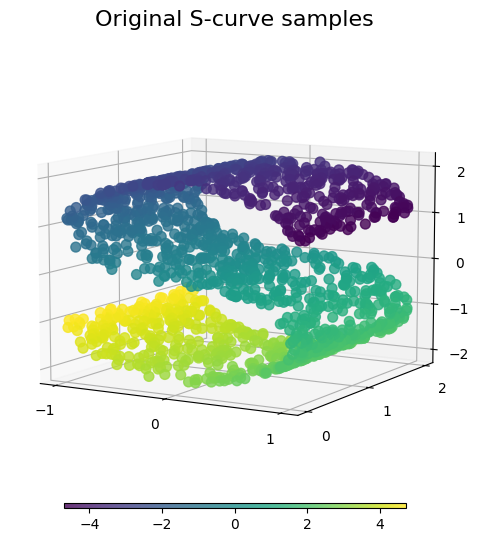

In [3]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")

## Define algorithms for the manifold learning

Manifold learning is an approach to non-linear dimensionality reduction.
Algorithms for this task are based on the idea that the dimensionality of
many data sets is only artificially high.


In [4]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

### Multidimensional scaling

Multidimensional scaling (MDS) seeks a low-dimensional representation
of the data in which the distances respect well the distances in the
original high-dimensional space.
Read more in the `User Guide <multidimensional_scaling>`.



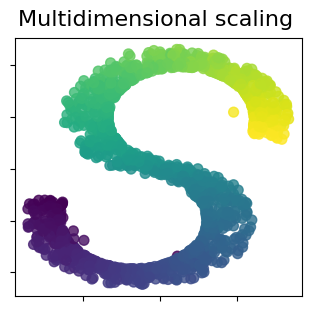

In [12]:
md_scaling = manifold.MDS(
    n_components=n_components, max_iter=50, n_init=4, random_state=rng
)
S_scaling = md_scaling.fit_transform(S_points)

plot_2d(S_scaling, S_color, "Multidimensional scaling")

### Locally linear embedding (LLE)

LLE seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

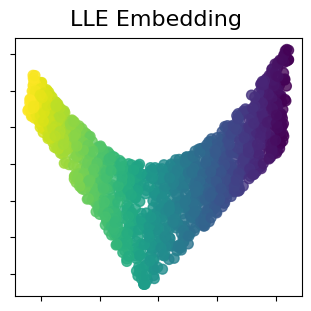

In [13]:
LLE = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, reg=0.001)
S_lle = LLE.fit_transform(S_points)

plot_2d(S_lle, S_color, "LLE Embedding")

### Isomap Embedding

Non-linear dimensionality reduction through Isometric Mapping.
Isomap seeks a lower-dimensional embedding which maintains geodesic
distances between all points.



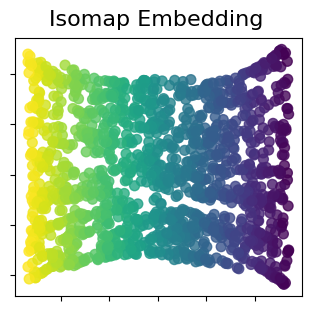

In [14]:
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(S_points)

plot_2d(S_isomap, S_color, "Isomap Embedding")

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy

n_neighbors: 2


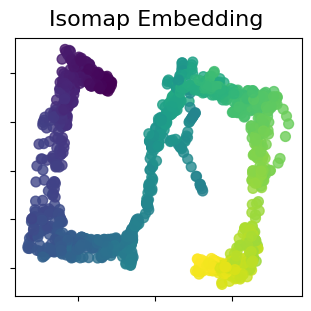

n_neighbors: 4


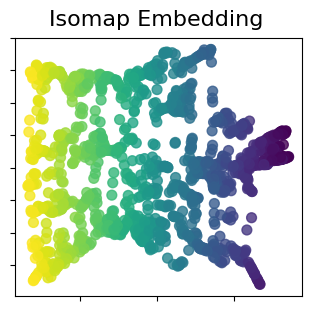

n_neighbors: 6


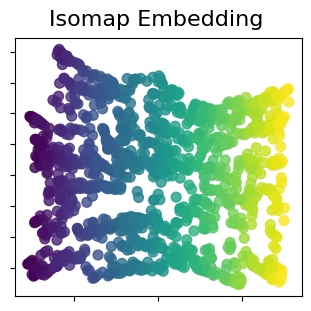

n_neighbors: 8


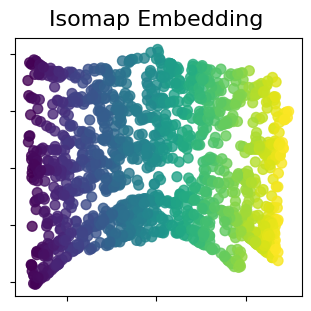

n_neighbors: 10


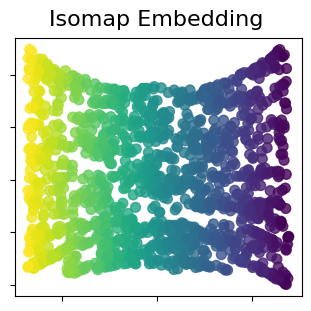

n_neighbors: 12


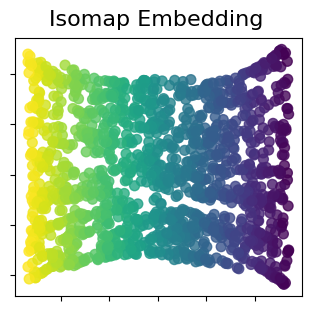

n_neighbors: 14


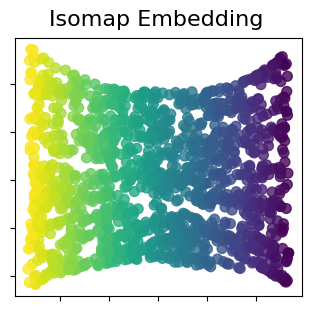

n_neighbors: 16


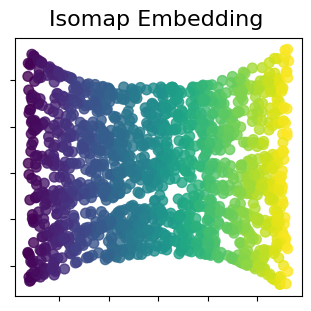

n_neighbors: 18


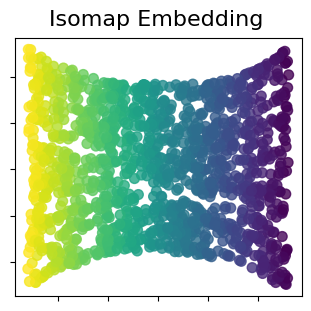

In [15]:
import numpy as np

for n_neighbors in np.arange(2,20,2):

    isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)

    S_isomap = isomap.fit_transform(S_points)

    print('n_neighbors:', n_neighbors)
    plot_2d(S_isomap, S_color, "Isomap Embedding")
    plt.show()

### T-distributed Stochastic Neighbor Embedding

It converts similarities between data points to joint probabilities and
tries to minimize the Kullback-Leibler divergence between the joint probabilities
of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost
function that is not convex, i.e. with different initializations we can get
different results. Read more in the `User Guide <t_sne>`.



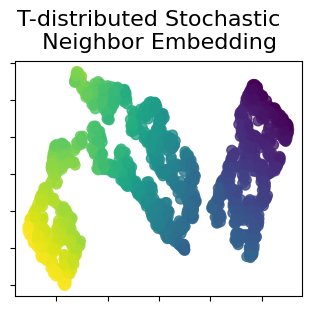

CPU times: user 13.6 s, sys: 166 ms, total: 13.8 s
Wall time: 13.7 s


In [10]:
%%time

t_sne = manifold.TSNE(n_components = n_components)

S_t_sne = t_sne.fit_transform(S_points)

plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")

  0%|          | 0/10 [00:00<?, ?it/s]

peplexity: 1


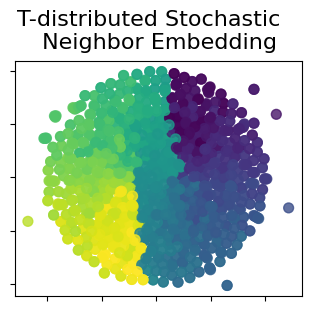

 10%|█         | 1/10 [00:25<03:53, 25.99s/it]

peplexity: 2


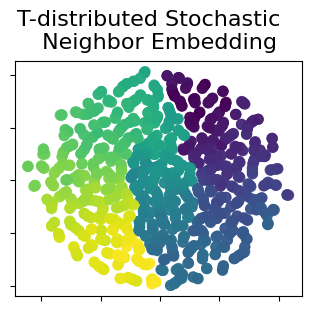

 20%|██        | 2/10 [00:44<02:52, 21.60s/it]

peplexity: 5


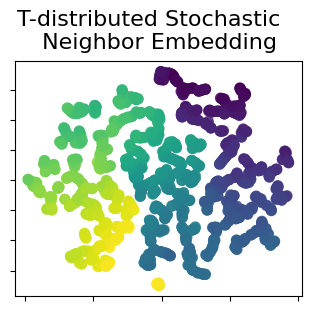

 30%|███       | 3/10 [01:14<02:53, 24.77s/it]


KeyboardInterrupt: 

In [17]:
from tqdm import tqdm

for perplexity in tqdm([1, 2, 5, 10, 20, 30, 50, 100, 200, 1000]):
    t_sne = manifold.TSNE(n_components = n_components, perplexity = perplexity)

    S_t_sne = t_sne.fit_transform(S_points)

    print('peplexity:', perplexity)
    plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")
    plt.show()

Отличная статья про параметры t-SNE: https://distill.pub/2016/misread-tsne/

UMAP: https://towardsdatascience.com/umap-dimensionality-reduction-an-incredibly-robust-machine-learning-algorithm-b5acb01de568

In [21]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


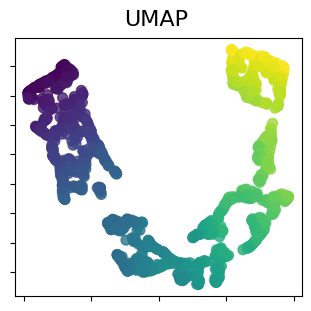

CPU times: user 5.78 s, sys: 395 ms, total: 6.17 s
Wall time: 7.54 s


In [9]:
%%time

import umap

reducer = umap.UMAP()

S_umap = reducer.fit_transform(S_points)
plot_2d(S_umap, S_color, "UMAP")